In [1]:
import numpy as np
import pandas as pd

# 层次分析法

层 次 分 析 法， 即Analytic Hierarchy Process(AHP) ， 是美国运筹学家 Saaty 于 ２０ 世纪 ７０ 年代初 期提出的一种主观赋值评价方法。 层次分析法将与决策有关的元素分解成目标、 准则、方案等多个层次， 并在此基础上进行定性和定量分析， 是一种系统、简便、灵活有效的决策方法。这个算法是一个多指标综合评价算法，由于这个算法简单、实用，因此在经管类或者实际生活中应用的非常多，其一般有两个用途： **指标定权**和**方案决策**。    
  
具体可以参考：论文需要用层次分析法，怎么用层次分析法计算权重？急求，需要细点讲解，网上收罗了些，没看明白。感谢！? - Kerry的回答 - 知乎
https://www.zhihu.com/question/50775079/answer/2281210542

# 案例  
比如要选择一个旅游地，构建如下层次：
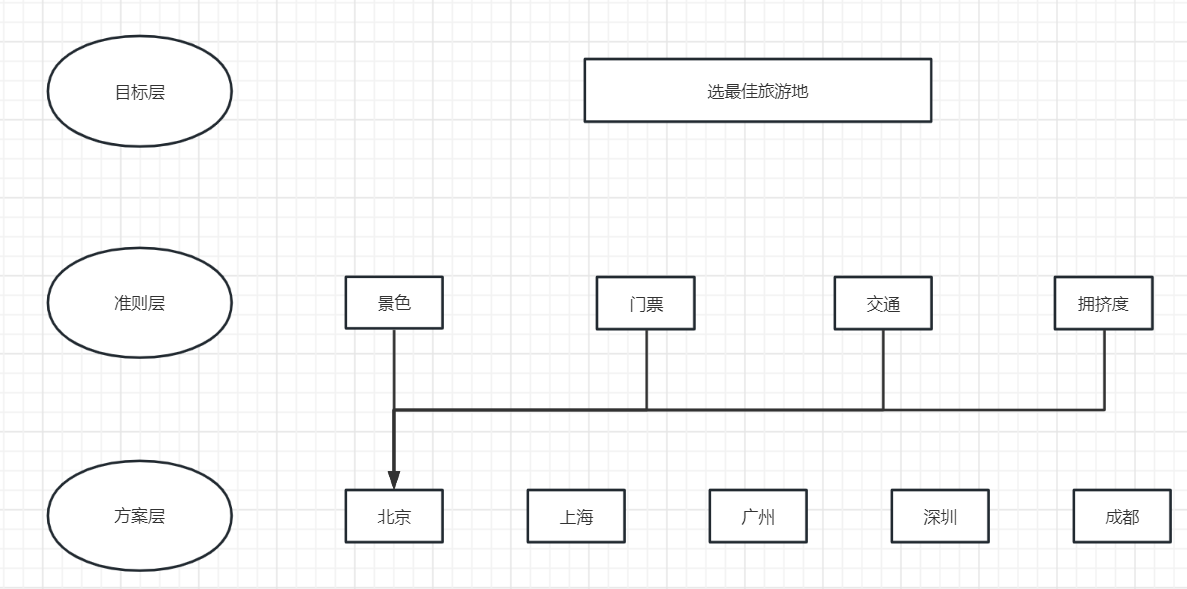
决定我们选哪个城市因素是以上这些因素，但是每个从主观上对这些因素看重程度是不一样的，所以需要确定权重，后面才能计算得分。

## 构建判断矩阵  
- 1. 任意两个因素之间的比较，认为越重要的，打分就越高。
- 2. 注意一致性，即如果认为A比B重要，B比C重要，那么A一定也是比C重要。
- 3. 这个打分，采用专家打分法，采取一堆人来进行打分，每个人打分均要服从第二点，然后求均值即可。 
- 4. 打分规则可以采用下面这种，也可以自己定义
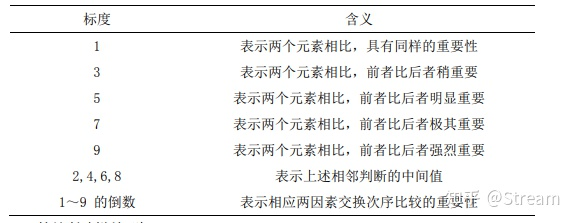  

- 最后得到的判断矩阵如下：
<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>景色</th>      <th>门票</th>      <th>交通</th>      <th>拥挤度</th>    </tr>  </thead>  <tbody>    <tr>      <th>景色</th>      <td>1</td>      <td>0.333333</td>      <td>0.5</td>      <td>0.5</td>    </tr>    <tr>      <th>门票</th>      <td>3</td>      <td>1.000000</td>      <td>2.0</td>      <td>2.0</td>    </tr>    <tr>      <th>交通</th>      <td>2</td>      <td>0.500000</td>      <td>1.0</td>      <td>2.0</td>    </tr>    <tr>      <th>拥挤度</th>      <td>2</td>      <td>0.500000</td>      <td>0.5</td>      <td>1.0</td>    </tr>  </tbody></table>

In [1]:
A = pd.read_clipboard()

In [2]:
A

,景色,门票,交通,拥挤度
景色,1,0.333333,0.5,0.5
门票,3,1.000000,2.0,2.0
交通,2,0.500000,1.0,2.0
拥挤度,2,0.500000,0.5,1.0


In [3]:
A.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>景色</th>\n      <th>门票</th>\n      <th>交通</th>\n      <th>拥挤度</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>景色</th>\n      <td>1</td>\n      <td>0.333333</td>\n      <td>0.5</td>\n      <td>0.5</td>\n    </tr>\n    <tr>\n      <th>门票</th>\n      <td>3</td>\n      <td>1.000000</td>\n      <td>2.0</td>\n      <td>2.0</td>\n    </tr>\n    <tr>\n      <th>交通</th>\n      <td>2</td>\n      <td>0.500000</td>\n      <td>1.0</td>\n      <td>2.0</td>\n    </tr>\n    <tr>\n      <th>拥挤度</th>\n      <td>2</td>\n      <td>0.500000</td>\n      <td>0.5</td>\n      <td>1.0</td>\n    </tr>\n  </tbody>\n</table>'

## 计算最大特征值
- 关于特征值与特征向量：  
设 A 是n阶方阵，如果存在数m和非零n维列向量x，使得 Ax=mx 成立，则称 m 是A的一个特征值（characteristic value)或本征值（eigenvalue)。非零n维列向量x称为矩阵A的属于（对应于）特征值m的特征向量或本征向量，简称A的特征向量或A的本征向量。

In [79]:
# 该函数返回矩阵的特征值与对应的特征向量
特征值, 特征向量 = np.linalg.eig(A)

In [80]:
特征值

array([ 4.07101229+0.j        , -0.01772704+0.53620703j,
       -0.01772704-0.53620703j, -0.03555822+0.j        ])

In [81]:
max_eigenvalue =  max(特征值).real
print("最大特征值：",max_eigenvalue)

最大特征值： 4.071012291765451


## 进行一致性检验  
- 即如果判断矩阵汇总出现A比B重要，B比C重要，那么A必须比C重要。

### 计算CI  
$$
CI = \frac{\lambda_{max}-n}{n-1}
$$

In [82]:
# n就是需要定权的因素的个数，这里有景色、门店、交通、拥挤度 共 4 个
n = 4
CI = (max_eigenvalue-n) / (n-1)
CI

0.023670763921817144

### 根据CI、RI值求解CR值，判断其一致性是否通过  
- RI查表: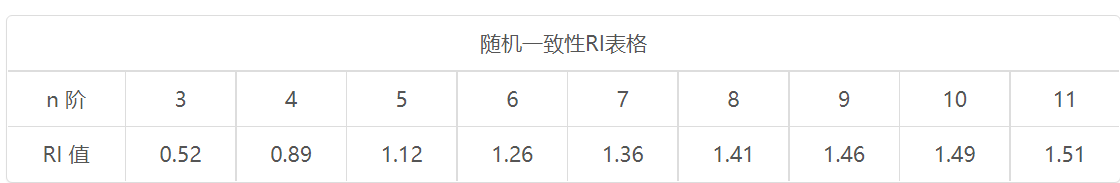
- CR计算公式
$$
CR = \frac{CI}{RI}
$$


In [88]:
# 这里n等于4
RI = 0.89

In [89]:
CR = CI / RI
CR

0.026596363957097916

**CR值小于0.1则说明通过一致性检验，反之则说明没有通过一致性检验。**  
次数CR<0.1,满足条件，则说明通过一致性减压，该判断矩阵可用。

## 计算权重  
- 此处采用均根法

In [96]:
# 计算每行连续相乘的结果
a = A.cumprod(axis=1).iloc[:, -1]
a

景色      0.083333
门票     12.000000
交通      2.000000
拥挤度     0.500000
Name: 拥挤度, dtype: float64

In [99]:
# 结果开n次根号,这里n=4
b = a.apply(lambda x:pow(x, 1/4))
b

景色     0.537285
门票     1.861210
交通     1.189207
拥挤度    0.840896
Name: 拥挤度, dtype: float64

In [101]:
# 计算权重
w = b / b.sum()
w

景色     0.121322
门票     0.420271
交通     0.268529
拥挤度    0.189879
Name: 拥挤度, dtype: float64

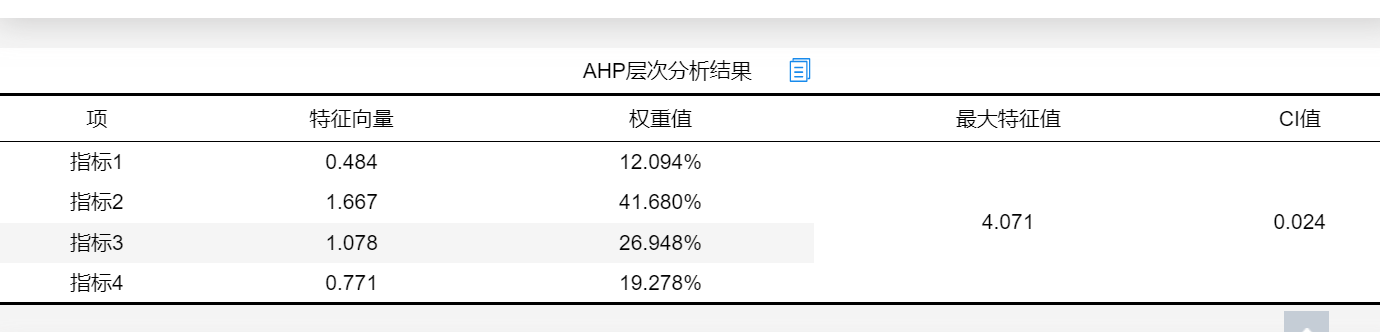

和spassAU结果差不多..